## <center>Telecom Customer Churn Analysis Project

## 1. Introduction & Business Understanding

### 1.1 Business Problem
Customer churn is a major concern for businesses, particularly in the telecommunications industry, where acquiring new customers is costlier than retaining existing ones. Understanding why customers leave helps businesses improve retention strategies, enhance customer experience, and increase revenue.


### 1.2 Objective of Analysis
This analysis follows the CRISP-DM methodology to:

1. Identify key factors influencing customer churn.
2. Analyze customer behavior patterns based on demographics, services, and contract types.
3. Provide data-driven recommendations for improving customer retention.

## 2. Data Understanding
### 2.1 Loading and Inspecting Data
We start by loading the dataset and reviewing its structure.

In [1]:
# importing relevant libaries
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
path = "./data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(path)

In [3]:
# Data inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observations from Data Inspection**
* Dataset contains 7,043 records and 21 columns.

**Data types:**
** Categorical: Gender, Partner, Dependents, InternetService, PaymentMethod, Churn, etc.
** Numerical: Tenure, MonthlyCharges, TotalCharges (but stored as an object).

**Potential Issues:**
* TotalCharges is stored as object instead of numeric.
* Need to check for missing values and duplicates.


## 3. Data Preparation & Cleaning
### 3.1 Handling Missing Values
We'll check for any missing values in the dataset

In [4]:
# Make a copy of data
df = data.copy()

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

>There are no missing values in the dataset. However, we still need to check for potential hidden missing values (e.g., blank strings or incorrect data types).

### 3.2 Converting TotalCharges to Numeric
Since TotalCharges is stored as an object (string), we need to convert it to a numeric type. We'll also check for any invalid entries

In [6]:
# Identify non-numeric values in 'TotalCharges'
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check for missing values again after conversion
df["TotalCharges"].isnull().sum()


11

>After converting TotalCharges to a numeric type, we found 11 missing values. These may be due to blank spaces in the dataset.

**Handling Strategy:**
>Since TotalCharges is directly related to tenure, we can assume that customers with missing values are new customers (tenure = 0).

* We will fill these missing values with 0 since they haven't been charged yet. ​

In [7]:
# Replace missing TotalCharges with 0
df["TotalCharges"].fillna(0, inplace=True)

# Confirm there are no missing values
df["TotalCharges"].isnull().sum()


/tmp/ipykernel_32409/3297314842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


0

>Now, all missing values are handled, ensuring the dataset is clean and ready for further analysis.



### 3.3 Checking for Duplicates
Next, we check for any duplicate records that might skew the analysis.

In [8]:
# Check for duplicate customer IDs
duplicate_count = df.duplicated(subset=['customerID']).sum()
duplicate_count


0

>Each customerID is unique, confirming that there are no duplicate entries in the dataset.

### 3.4 Ensuring Consistency in Categorical Values
Some categorical columns may have inconsistent formatting (e.g., "Yes"/"yes", "No"/"no"). We will standardize these values

In [9]:
# Convert categorical columns to consistent format (lowercase)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply formatting to all categorical columns (except customerID)
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Verify changes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


>All categorical values are now lowercased and stripped of extra spaces, ensuring consistency across the dataset.

**Final Data Cleaning Summary**
* ✅ Handled missing values in TotalCharges by replacing them with 0.
* ✅ Checked and confirmed no duplicate records exist.
* ✅ Standardized categorical values to lowercase for consistency.

## 4. Exploratory Data Analysis (EDA)
In this section, we will analyze churn trends and customer behaviors using visualizations to uncover patterns.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_32409/3592869777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette=["blue", "red"])


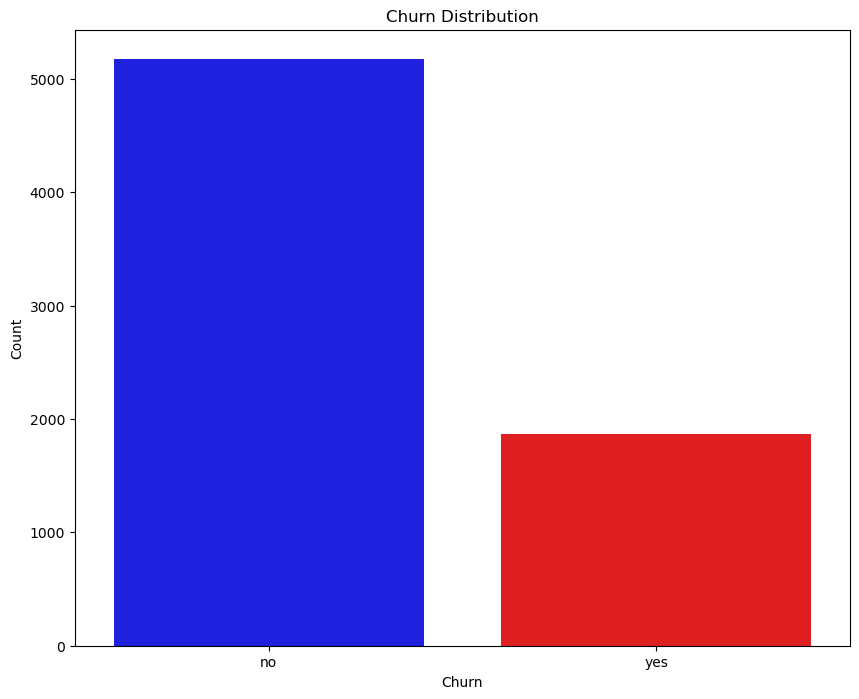

Churn
no     73.463013
yes    26.536987
Name: proportion, dtype: float64

In [11]:
# Plot churn distribution
plt.figure(figsize=(10, 8))
sns.countplot(x=df["Churn"], palette=["blue", "red"])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Calculate churn percentage
churn_rate = df["Churn"].value_counts(normalize=True) * 100
churn_rate


#### Observation: Churn Rate is 26.54%
* 73.46% of customers are retained, while 26.54% have churned.
* This indicates a significant churn problem, requiring deeper analysis into who is leaving and why.

We'll start by analyzing the dataset's structure, summarizing key statistics, and visualizing distributions.

### 4.2. Summary Statistics and Distributions
We'll compute descriptive statistics and plot histograms for numerical features.

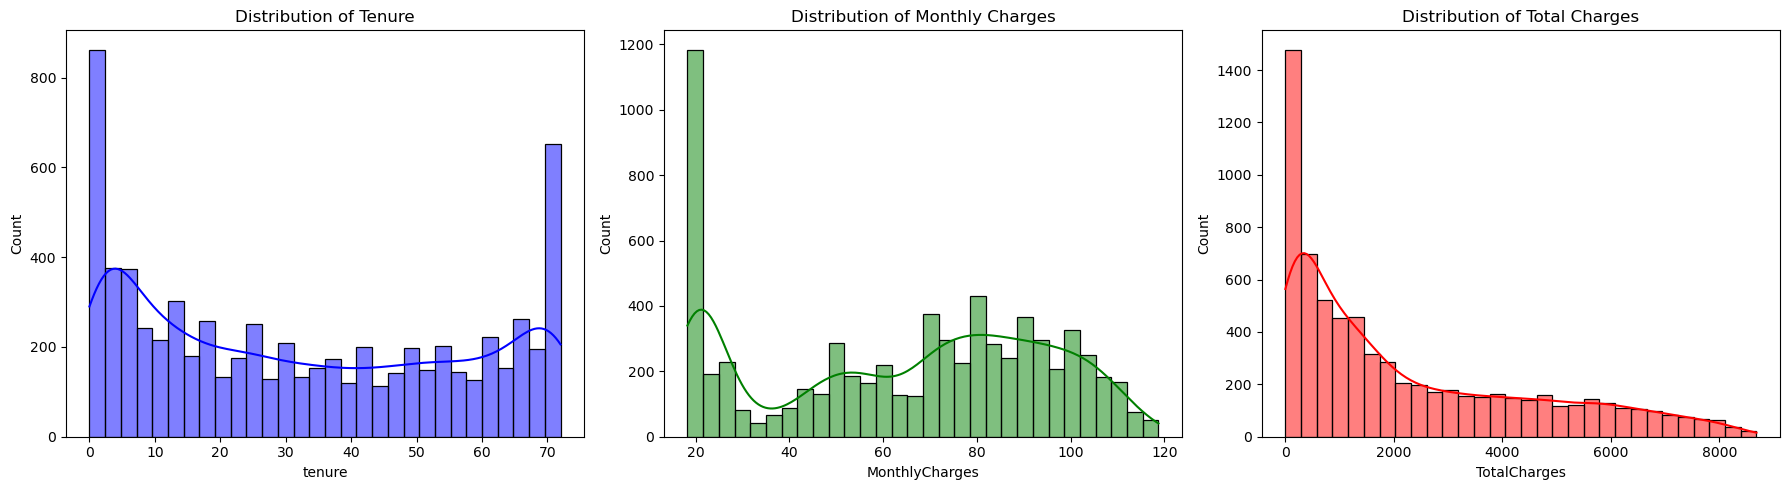

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics for numerical columns
summary_stats = df.describe()

# Plot distributions for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["tenure"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Tenure")

sns.histplot(df["MonthlyCharges"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Monthly Charges")

sns.histplot(df["TotalCharges"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Total Charges")

plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats


### Observations from Summary Statistics & Distributions
1. Tenure (Months)
    * Customers have a wide range of tenure, from 0 to 72 months.
    * Most customers have shorter tenures, meaning many customers leave early.

2. Monthly Charges
    * Prices range between $18.25 and $118.75.
    * There is a significant portion of customers paying lower fees.

3. Total Charges
    * Some customers have TotalCharges = 0, likely those with very short tenure.
    * The distribution is skewed, meaning a few customers pay significantly higher amounts.


### 4.3 Churn by Contract Type
Next, we analyze how contract types influence customer churn

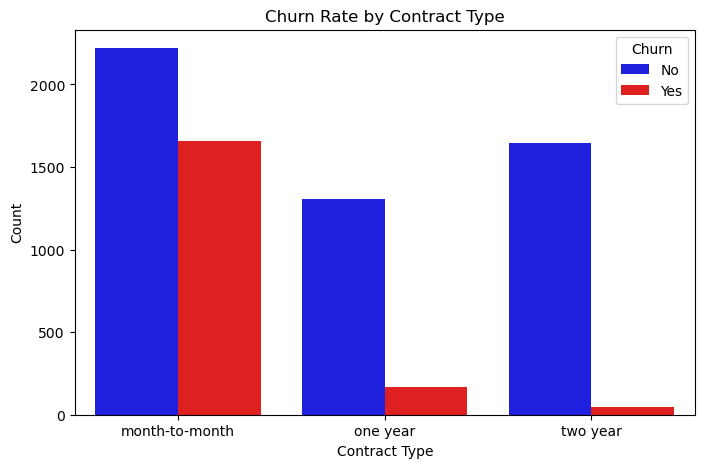

Churn,no,yes
Contract,,
month-to-month,57.290323,42.709677
one year,88.730482,11.269518
two year,97.168142,2.831858


In [13]:
# Plot churn distribution by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette=["blue", "red"])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

# Calculate churn percentages for each contract type
churn_by_contract = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100
churn_by_contract


#### Observation: Month-to-Month Contracts Have the Highest Churn (42.7%)
    * Month-to-month contracts have a much higher churn rate (42.7%) than one-year (11.27%) or two-year contracts (2.83%).
    * Long-term contracts retain customers better, possibly due to discounts or commitment factors.

* Business Insight:
>Offering discounts or benefits for long-term contracts could help reduce churn.

### 4.4 Churn by Internet Service Type
Now, let's analyze whether internet service type affects churn

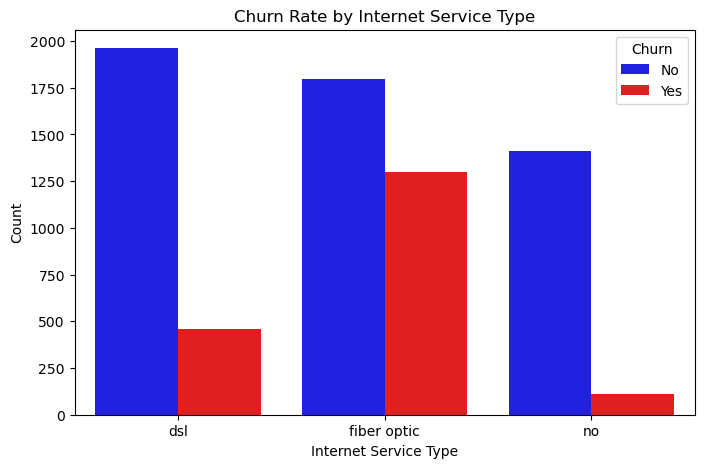

Churn,no,yes
InternetService,,
dsl,81.040892,18.959108
fiber optic,58.107235,41.892765
no,92.595020,7.404980


In [14]:
# Plot churn distribution by Internet Service Type
plt.figure(figsize=(8, 5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette=["blue", "red"])
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

# Calculate churn percentages for each internet service type
churn_by_internet = df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack() * 100
churn_by_internet


#### Observation: Fiber Optic Customers Churn the Most (41.89%)
    * DSL has a lower churn rate (18.96%), while Fiber Optic has the highest churn rate (41.89%).
    * Customers without internet service have the lowest churn rate (7.40%), possibly because they only use phone services.

**Business Insight:**
* Fiber optic users may face service quality issues or pricing concerns.
* Improving fiber optic service reliability and offering better pricing could help reduce churn.


### 4.5 Churn by Monthly Charges
Now, let's analyze how monthly charges impact churn.

/tmp/ipykernel_32409/4273115852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette=["blue", "red"])


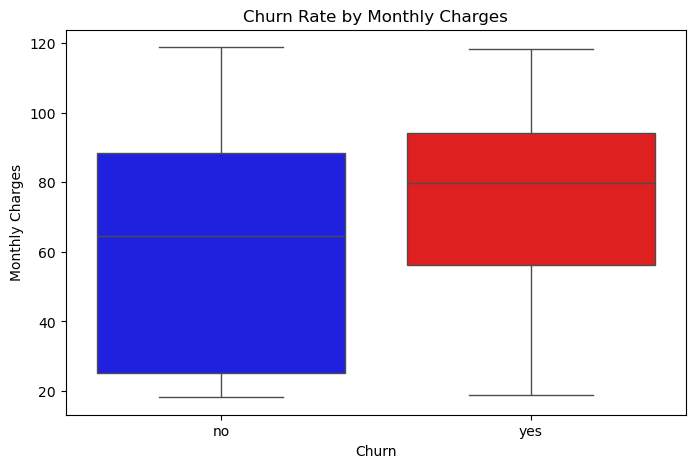

Churn
no     61.265124
yes    74.441332
Name: MonthlyCharges, dtype: float64

In [15]:
# Boxplot of Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette=["blue", "red"])
plt.title("Churn Rate by Monthly Charges")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# Calculate average monthly charges for churned vs. retained customers
monthly_charges_summary = df.groupby("Churn")["MonthlyCharges"].mean()
monthly_charges_summary


#### Observation: Higher Monthly Charges Correlate with Higher Churn
    * Customers who churn pay an average of $74.44 per month, while those who stay pay $61.26 per month.
    * This suggests that higher costs may be a significant driver of customer churn.

**Business Insight:**
* Introducing tiered pricing, discounts, or loyalty rewards for high-paying customers could help reduce churn.


### 4.5 Churn by Tenure (Customer Loyalty)
Next, let's analyze how long customers stay before churning.

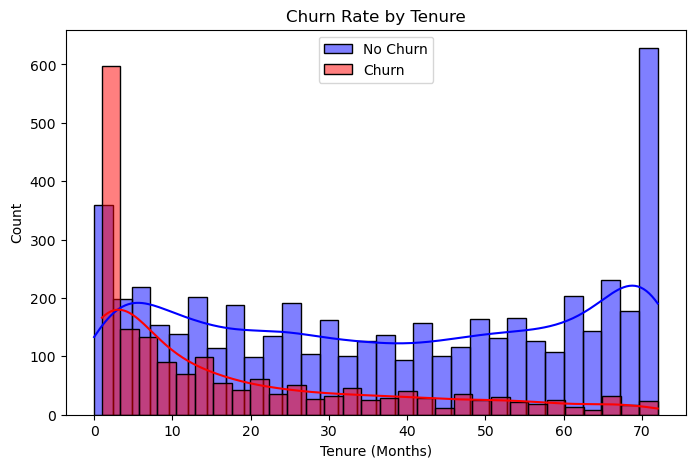

Churn
no     37.569965
yes    17.979133
Name: tenure, dtype: float64

In [16]:
# Plot distribution of tenure by churn
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == "no"]["tenure"], bins=30, color="blue", label="No Churn", kde=True)
sns.histplot(df[df["Churn"] == "yes"]["tenure"], bins=30, color="red", label="Churn", kde=True)
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Calculate average tenure for churned vs. retained customers
tenure_summary = df.groupby("Churn")["tenure"].mean()
tenure_summary


#### Observation: Churn is Highest Among New Customers
    * Customers who churn have an average tenure of 17.98 months, while those who stay have an average tenure of 37.57 months.
    * This confirms that new customers are more likely to leave early, possibly due to unmet expectations or poor onboarding experiences.

**Business Insight:**
>Improving customer onboarding and offering early incentives (e.g., discounts, personalized support) could help retain new customers.


## 5. Key Findings from EDA
1. Churn Rate is 26.54% – A significant number of customers leave the service.
2. Month-to-Month Contracts Have the Highest Churn (42.7%) – Customers with short-term contracts are more likely to leave.
3. Fiber Optic Customers Churn the Most (41.89%) – Likely due to service quality or pricing concerns.
4. Higher Monthly Charges Increase Churn – Customers paying $74.44/month churn more than those paying $61.26/month.
5. New Customers Churn Faster – Customers who churn have an average tenure of 17.98 months, compared to 37.57 months for retained customers.


## 6. Recommendations
1. Reduce Churn in Month-to-Month Contracts
    * Offer discounts or loyalty rewards for long-term commitments.
    * Introduce easy upgrade paths to one-year or two-year plans.

2. Improve Fiber Optic Customer Retention
    * Investigate customer complaints and service quality issues for Fiber Optic users.
    * Provide special incentives or better customer support for these users.

3. Address High Monthly Charges
    * Offer tiered pricing or customized plans for high-spending customers.
    * Implement loyalty programs to keep premium customers engaged.

4. Strengthen Customer Onboarding
    * Provide personalized welcome calls and early discounts.
    * Implement proactive customer support for new users in the first 6 months.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
